### **THINK TANK CASE STUDY**

### **DATA PROCESSING**

## The case study revolves around 4 data sets consisting of:
### **ORDERS :**
### 1.) *Orders (Order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order)*
### 2.) *Order_Products (Order_id, product_id, add_to_cart_order)*


### **SEGEMNT & ITEAMS :**
### 3.) *Departments (Department_id, Department)*
### 4.) *Products (Product_id, department_id, product_name)*

### -- **Below is a visual representation of the work flow on how the data sets are joined using primary key in Dataiku to fasten the preprocess stage in-order to increase efficiency**

<p align="center">
  <img src="assets/Dataflow.JPG">
</p>

## **OUR STORY**

## Kat-Max e-grocery is a renown up-and-coming new generation lifestyle brand. We have our brand presence in 10 counties and are always looking for new ways to improve and anticipate our customer needs. Covid-19 has definitely impacted the way our customers shop in our store, therefore the following are the questions we are trying to seek answers through this study in chronological order, to get deeper insights.

### **1.) Describe the datasets and the eventual anomalies you find.**

### **2.) Which patterns do you find in the purchasing behavior of the customers?**

### **3.) What are the categories and products the customers are most interested in?**

### **4.) Split customers into different groups based on their purchasing behavior**

### **5.) Justify your choice for your adopted method(s) and model(s).**

### **6.) Describe the defined customer groups. What are the features which are driving the differentiation amongst the different groups?**

### **7.) Optional: Give suggestions on how the business should treat these clusters differently.**

### **8.) At this point in your analysis, you are the dataset expert. Implement in your notebook any further ideas (initiatives, further analyses) you might have in mind which can be helpful for the business.**


<p align="center">
  <img src="assets/Kat-max.JPG">
</p>

## IMPORTING PACKAGES

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings


## LOADING DATA

In [102]:
cs1 = pd.read_csv("Data/Final Data.csv")

In [68]:
cs1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [69]:
cs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [70]:
cs1.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [71]:
cs1['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

## TAKING CARE OF NULL VALUES 

In [72]:
for col in cs1.columns:
    if cs1[col].dtypes == 'float64':
        cs1[col].fillna(-1,inplace=True) 

In [73]:
cs1.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [74]:
cs1['days_since_prior_order']= cs1['days_since_prior_order'].astype(np.int64)

In [75]:
cs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


## INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURES

In [76]:
for colum in cs1:
    unique_values = np.unique(cs1[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

## 1.) Describe the datasets and the eventual anomalies you find.

In [77]:
cs1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

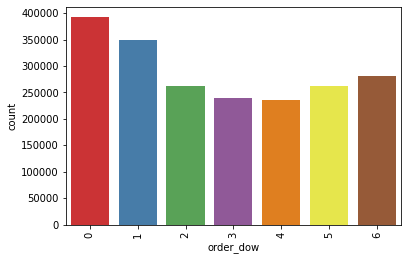

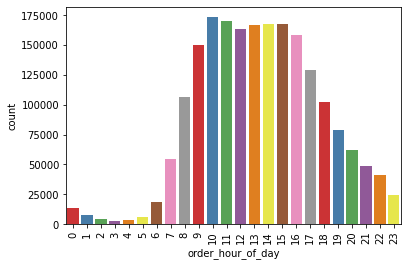

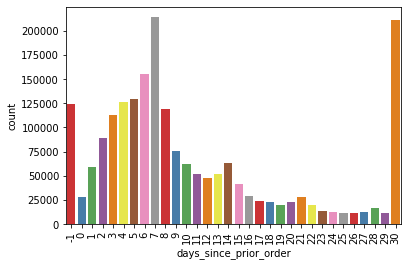

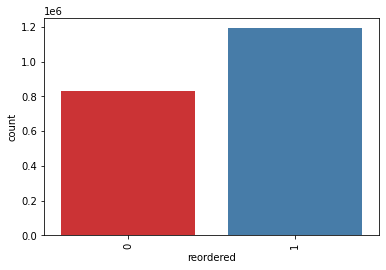

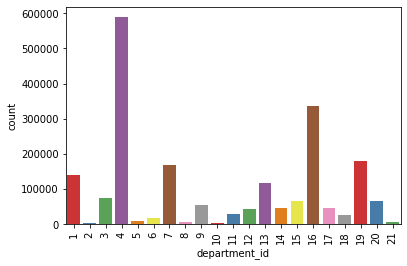

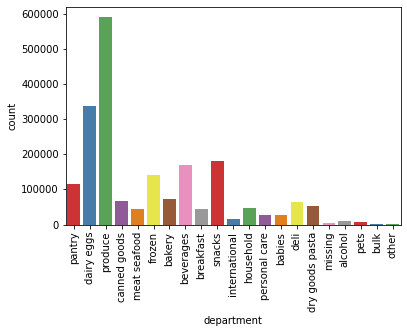

In [78]:
features = ['order_dow', 'order_hour_of_day',
       'days_since_prior_order','reordered', 'department_id', 'department']


for f in features:
    sns.countplot(x=f,data=cs1, palette="Set1")
    plt.xticks(rotation =90)
    plt.show()


In [79]:
cs1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce


In [80]:
cs2 = cs1[cs1['days_since_prior_order']>0]
cs2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
22,1201011,147243,14,0,16,3,94,1,0,7,beverages,tea
23,1201011,147243,14,0,16,3,83,2,0,4,produce,fresh vegetables
24,1201011,147243,14,0,16,3,83,3,1,4,produce,fresh vegetables
25,1201011,147243,14,0,16,3,24,4,1,4,produce,fresh fruits
26,1201011,147243,14,0,16,3,120,5,1,16,dairy eggs,yogurt
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce


In [81]:
cs2.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [82]:
cs2 = cs2.drop(['product_name','department'],axis=1)

In [83]:
cs2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
22,1201011,147243,14,0,16,3,94,1,0,7
23,1201011,147243,14,0,16,3,83,2,0,4
24,1201011,147243,14,0,16,3,83,3,1,4
25,1201011,147243,14,0,16,3,24,4,1,4
26,1201011,147243,14,0,16,3,120,5,1,16
...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4
2019497,458285,128787,42,2,19,3,115,1,1,7
2019498,458285,128787,42,2,19,3,32,2,1,4
2019499,458285,128787,42,2,19,3,32,3,1,4


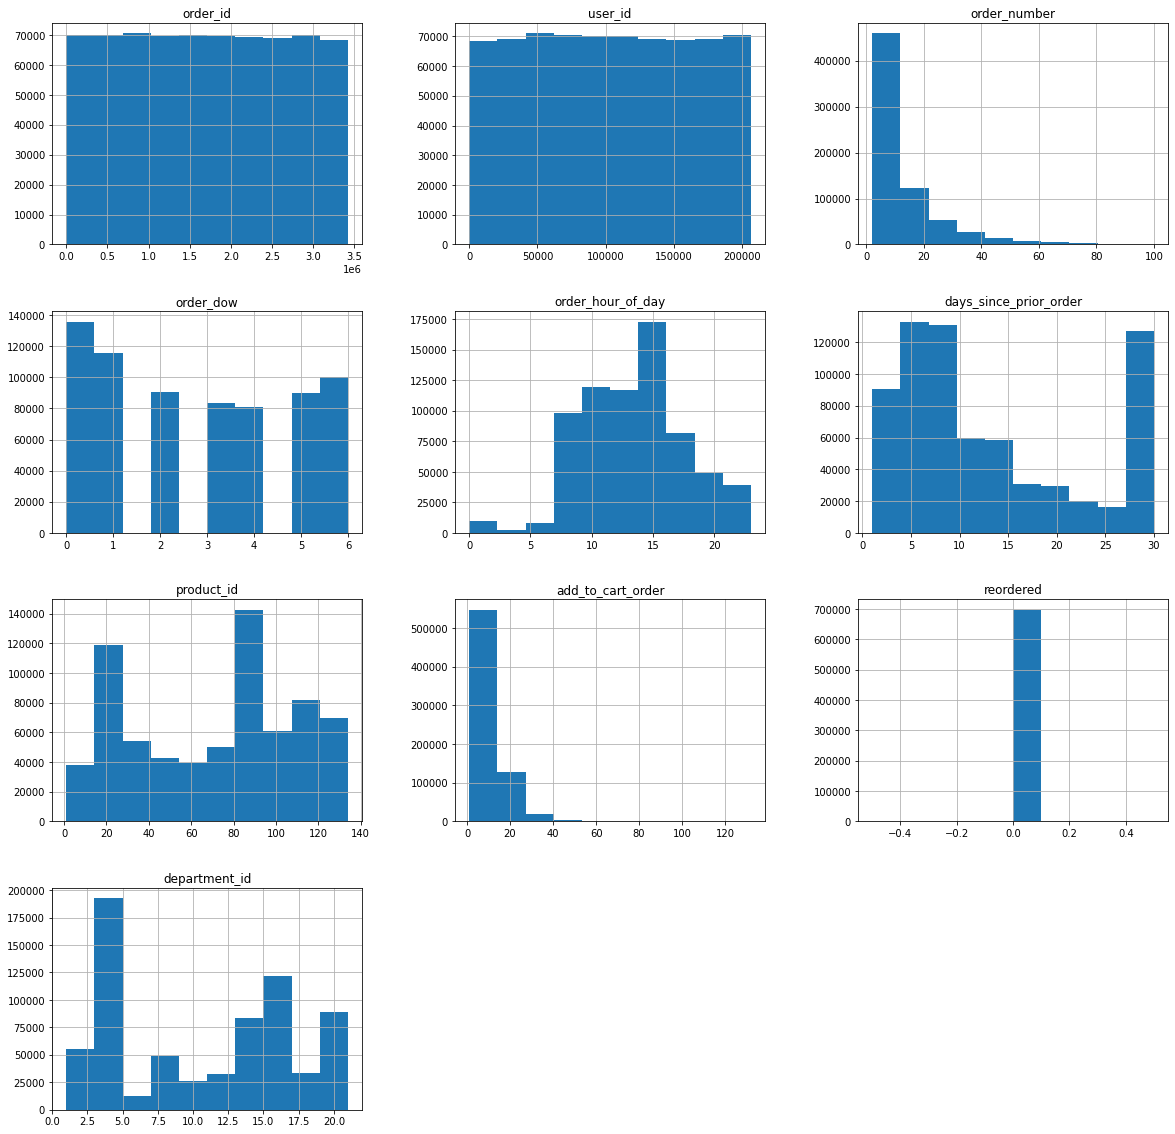

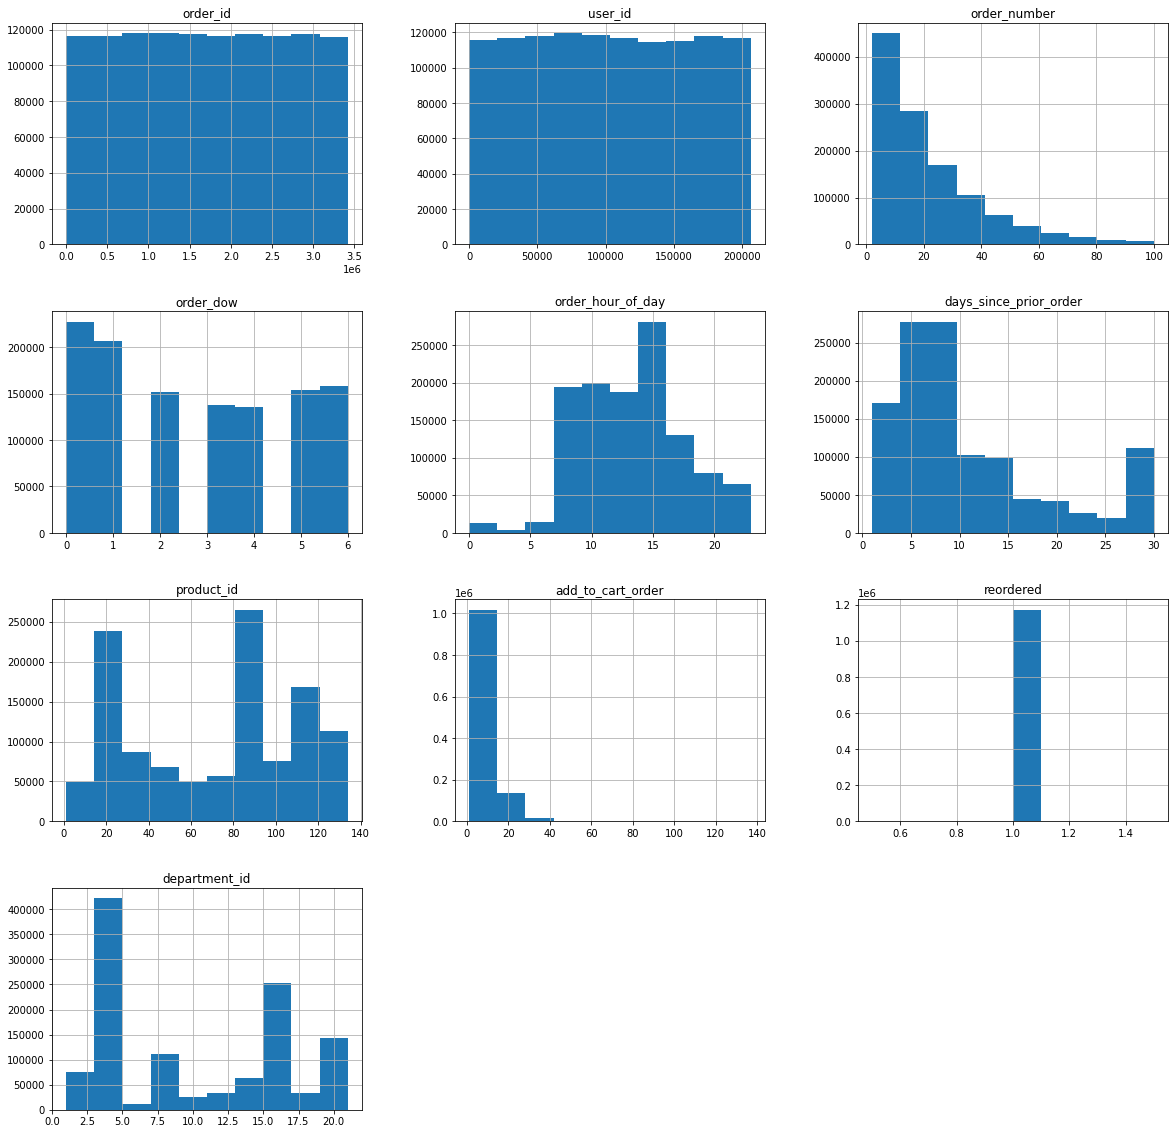

In [84]:
cs2.groupby('reordered').hist(figsize=(20,20))
plt.show()
plt.close()

In [86]:
cs2

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
22,1201011,147243,14,0,16,3,94,1,0,7
23,1201011,147243,14,0,16,3,83,2,0,4
24,1201011,147243,14,0,16,3,83,3,1,4
25,1201011,147243,14,0,16,3,24,4,1,4
26,1201011,147243,14,0,16,3,120,5,1,16
...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4
2019497,458285,128787,42,2,19,3,115,1,1,7
2019498,458285,128787,42,2,19,3,32,2,1,4
2019499,458285,128787,42,2,19,3,32,3,1,4


In [90]:
from sklearn.cluster import KMeans, k_means

In [91]:
cs3 = cs2[['order_number','order_dow','order_hour_of_day','days_since_prior_order','product_id','add_to_cart_order','reordered','department_id']]

In [96]:
# Running Kmeans

X_train = cs3.values

# We will start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)


# Print the clusters it assigns to each observation

print("The cluster are  :", kmeans.labels_)


# Print the Inertia
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [3 3 3 ... 4 4 2]
The Inertia is : 779438585.1367034


In [100]:
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

The inertia for : 2 Cluster is :  1477787457.198135
The inertia for : 3 Cluster is :  1130929008.7248178
The inertia for : 4 Cluster is :  924108725.9807224
The inertia for : 5 Cluster is :  779439483.9868823
The inertia for : 6 Cluster is :  697003701.6938925
The inertia for : 7 Cluster is :  644918731.9364495
The inertia for : 8 Cluster is :  609308901.194756
The inertia for : 9 Cluster is :  572123431.3999074
